In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import os.path
import scipy.stats as stats
"""   
Switch to the current folders and create a virtual environment with packages on the list of requirements.txt
"""

'   \nSwitch to the current folders and create a virtual environment with packages on the list of requirements.txt\n'

# Load the dataset

In [2]:
#df = pd.read_csv('/Users/andyfeng/Desktop/ME276/heart_disease.csv')
path = os.path.join('.','heart_disease.csv')
df = pd.read_csv(path)

In [3]:
# Look at the first few lines of dataset
df.head()

,Unnamed: 0,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression_Exercise,Peak_Exercise_ST_Segment,Num_Major_Vessels_Flouro,Thalassemia,Diagnosis_Heart_Disease
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
# Find the initial shape
df.shape

(303, 15)

In [5]:
# Remove the first column
# Look at the shape of filter dataset
df_drop = df.drop(df.columns[0], axis=1)

# Since the missing value in the dataset is donated by "?",
# replace it with np.nan before filtering
df_replace = df_drop.replace("?", np.nan)
df_filter = df_replace.dropna(axis=0)
df_filter.shape

(297, 14)

In [6]:
# Look at first few lines of df_filter
df_filter.head()

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression_Exercise,Peak_Exercise_ST_Segment,Num_Major_Vessels_Flouro,Thalassemia,Diagnosis_Heart_Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [7]:
# Find the features 
features = pd.Series(df_filter.columns)
features

0                          Age
1                          Sex
2              Chest_Pain_Type
3       Resting_Blood_Pressure
4            Serum_Cholesterol
5          Fasting_Blood_Sugar
6                  Resting_ECG
7      Max_Heart_Rate_Achieved
8      Exercise_Induced_Angina
9       ST_Depression_Exercise
10    Peak_Exercise_ST_Segment
11    Num_Major_Vessels_Flouro
12                 Thalassemia
13     Diagnosis_Heart_Disease
dtype: object

<Axes: >

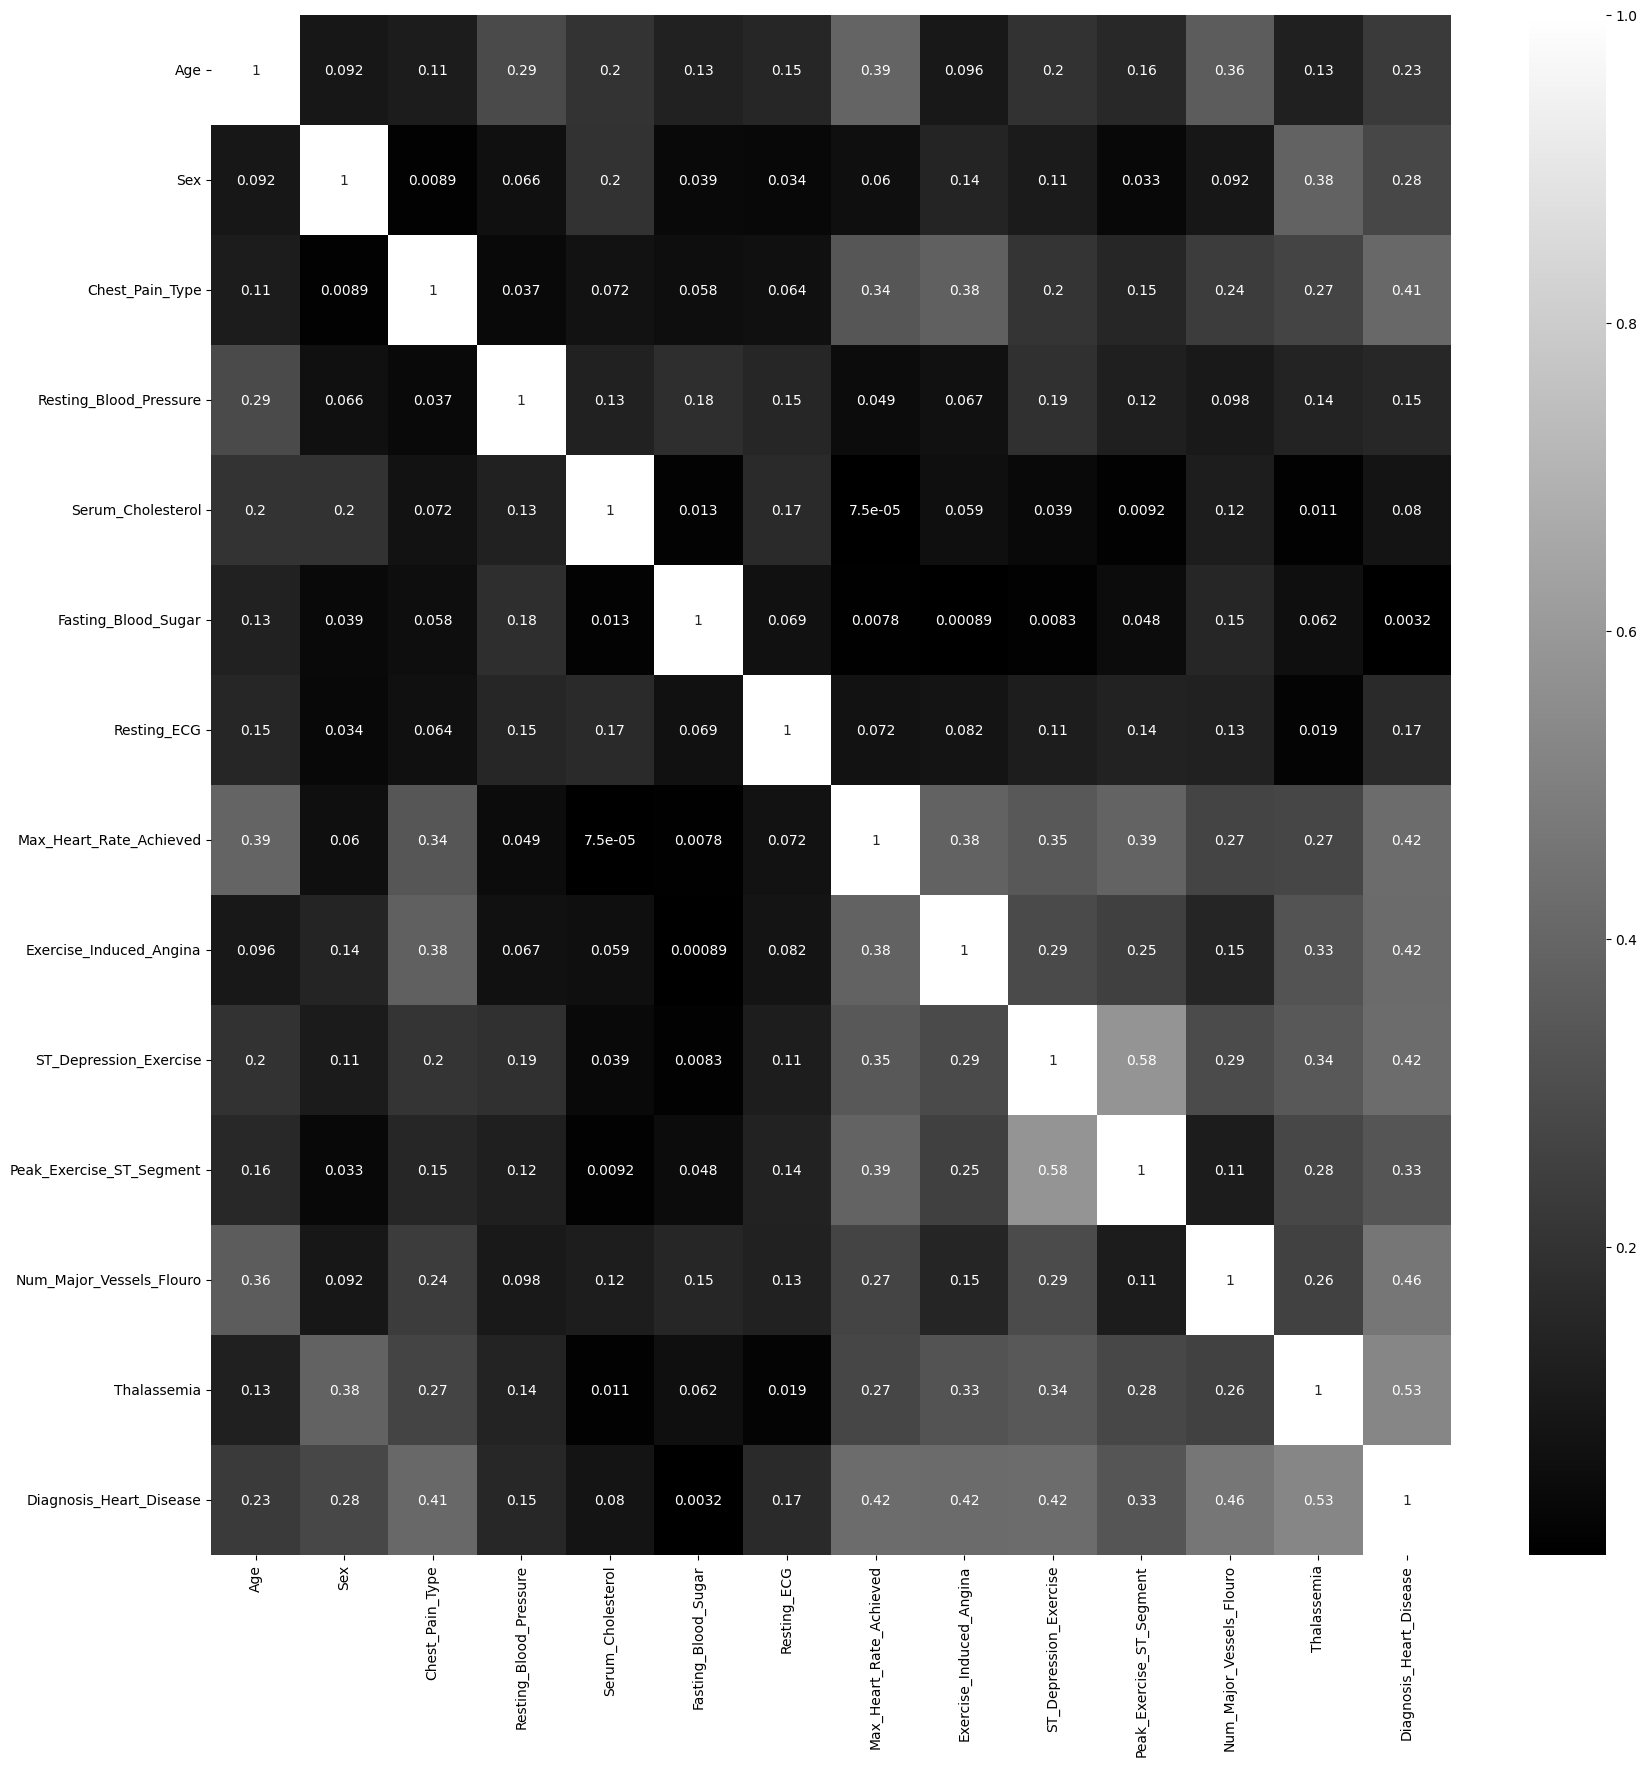

In [8]:
# Look at the correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(abs(df_filter.corr()), annot=True, cmap='gray')

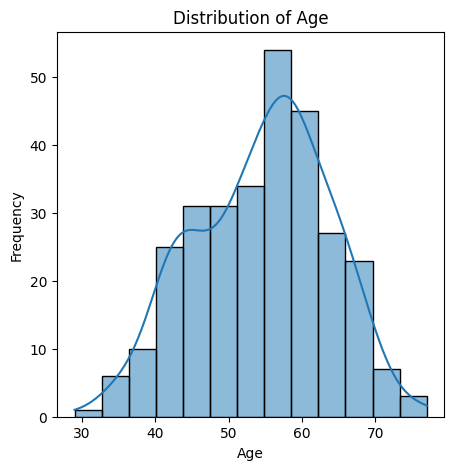

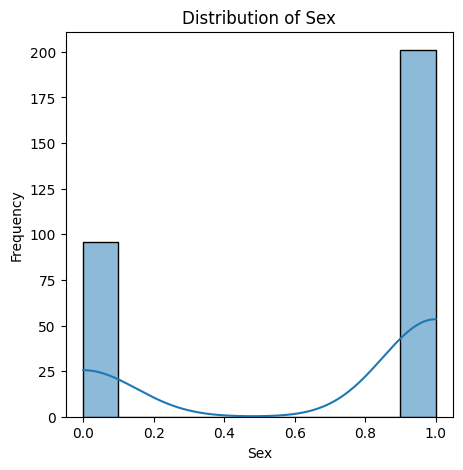

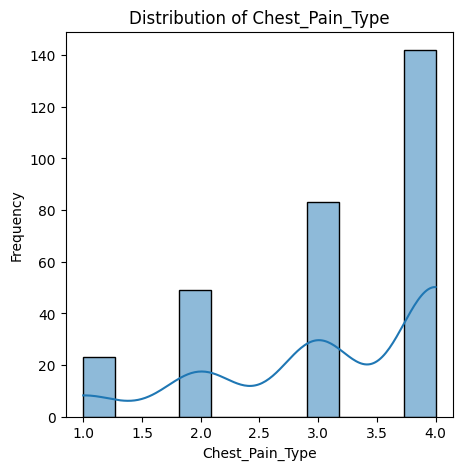

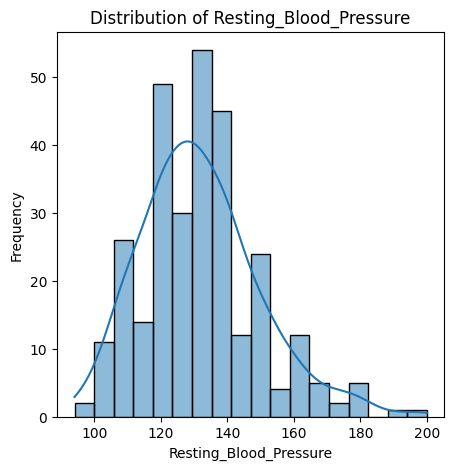

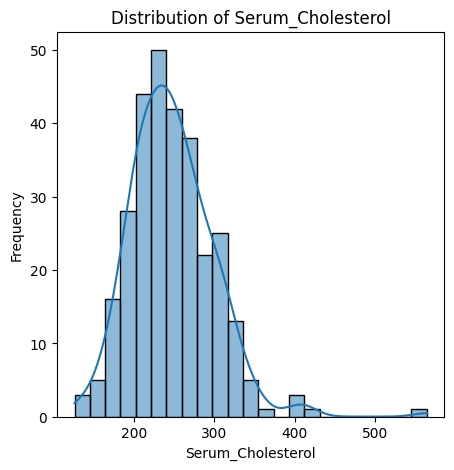

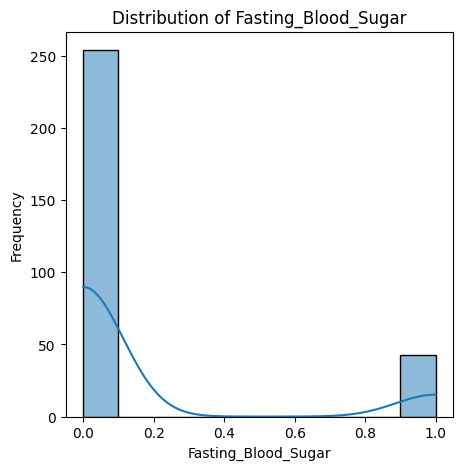

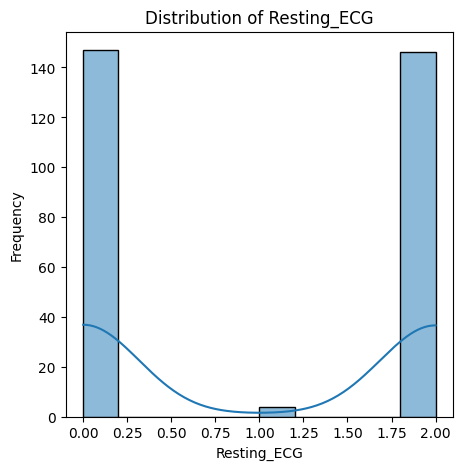

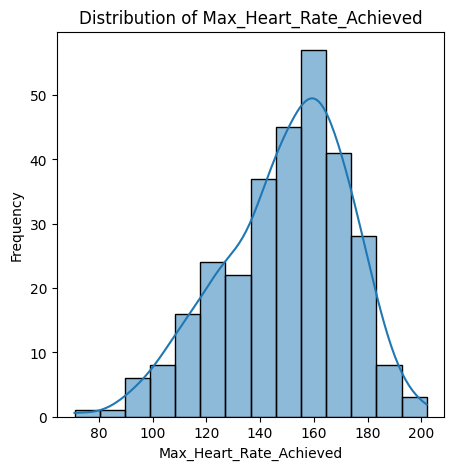

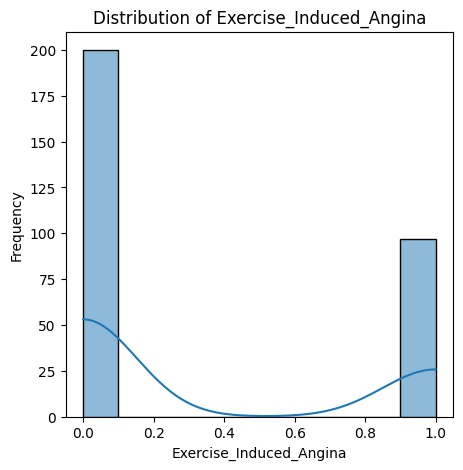

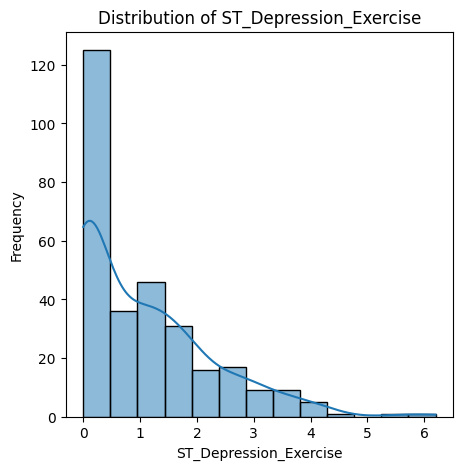

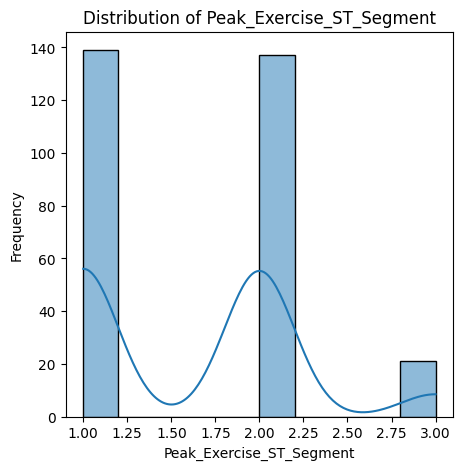

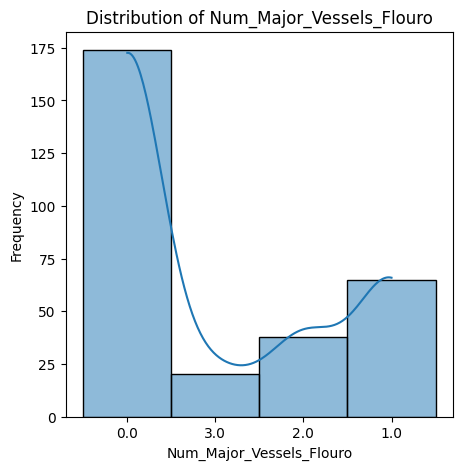

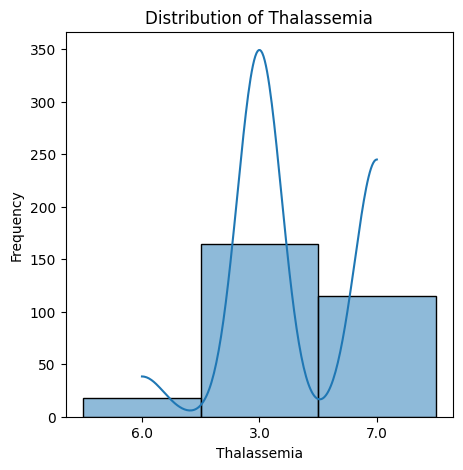

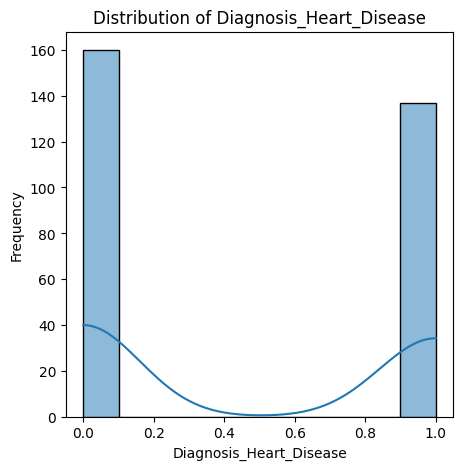

In [9]:
# Probe into the distribution of each features

# Loop through each column and create a histogram
for column in features:
    plt.figure(figsize=(5,5))
    sns.histplot(df_filter[column], kde=True)  # Use kde=True for Kernel Density Estimation
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


# Method1: PCA + Random Forest

# PCA plot



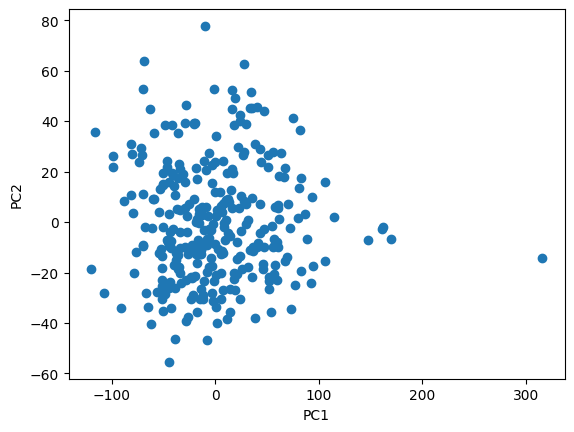

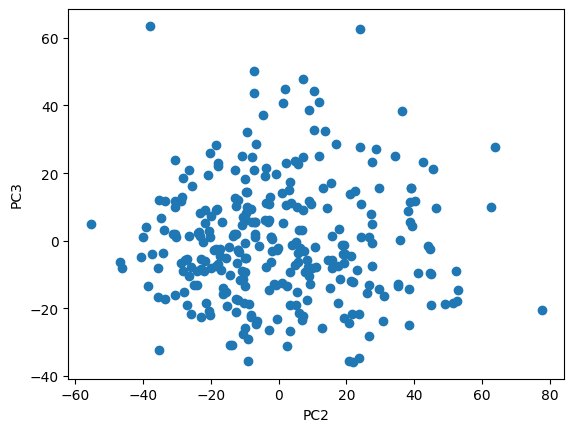

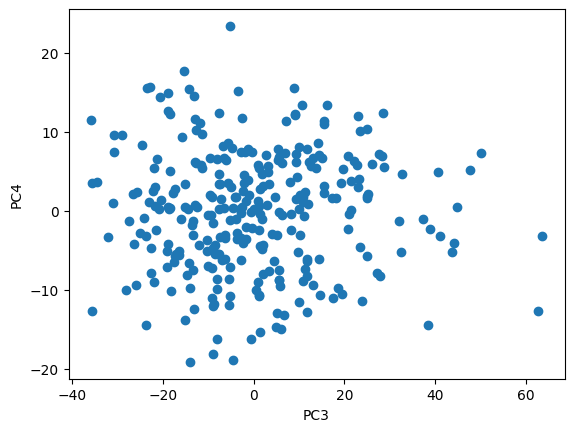

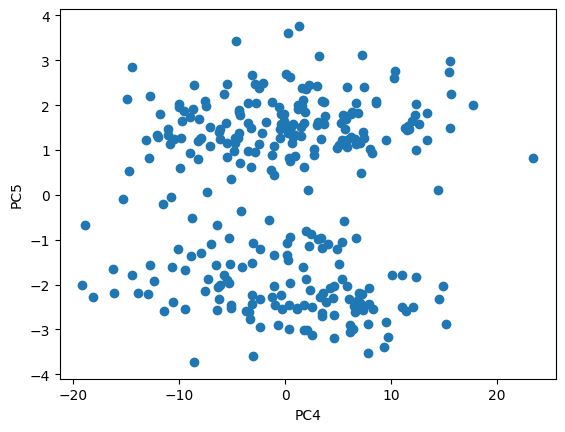

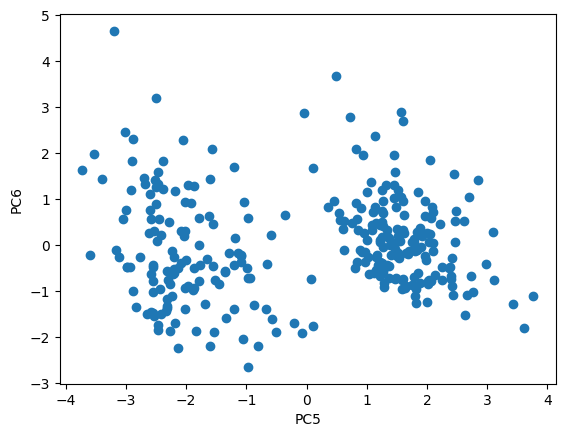

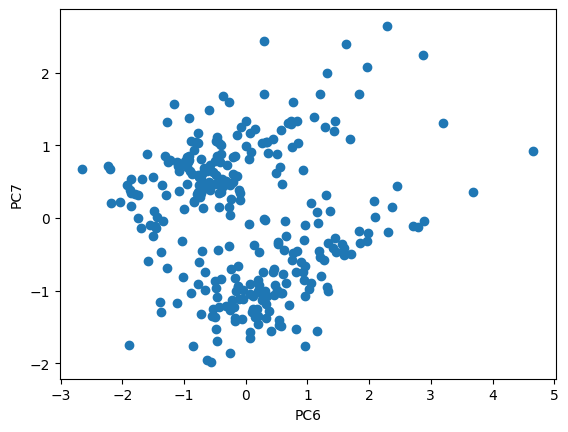

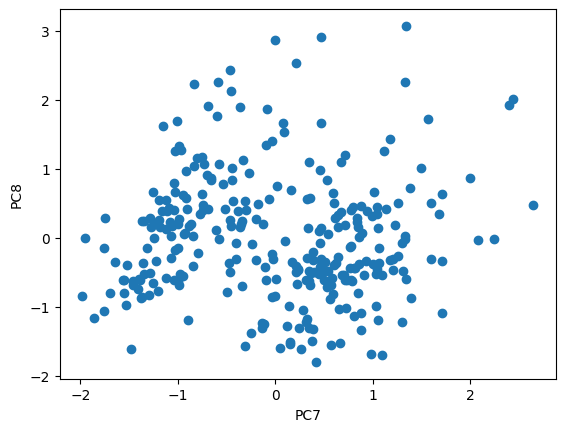

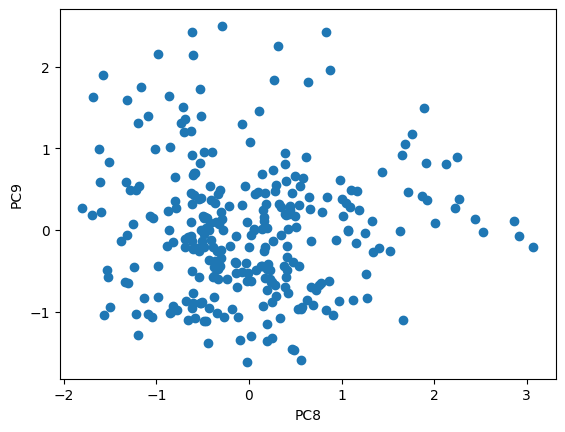

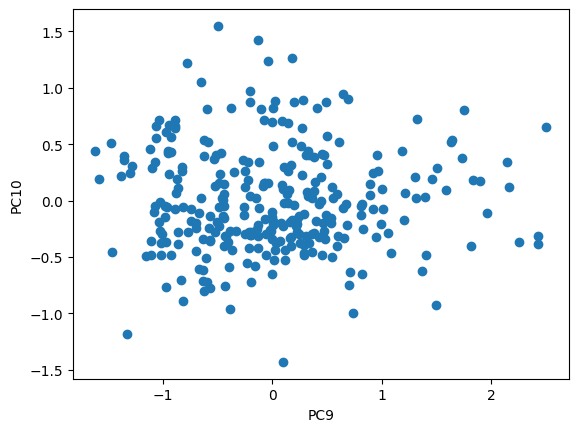

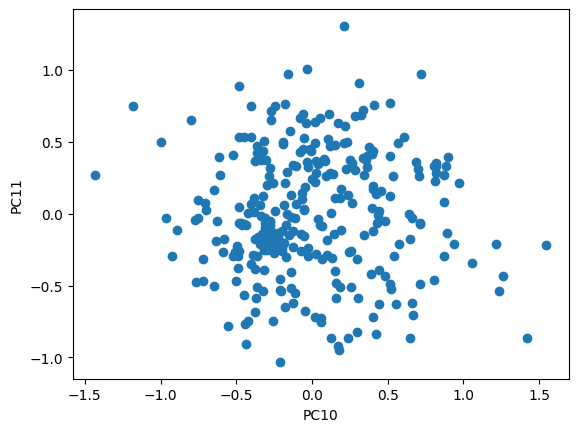

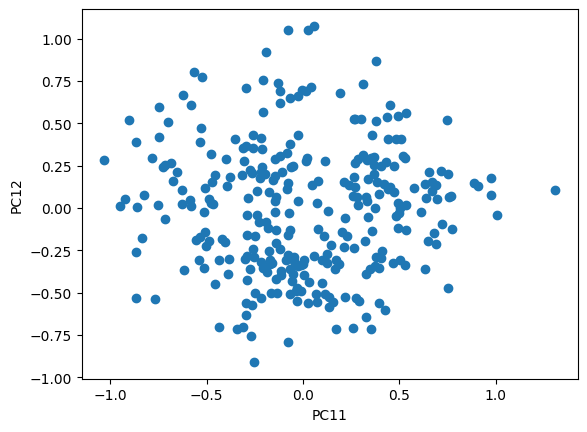

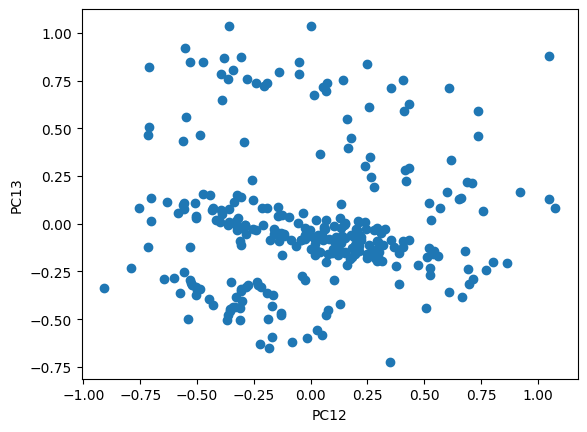

In [10]:
# Perform PCA
n_components = 13
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_filter)

# Create a new DataFrame with principal components
columns = [f'PC{i}' for i in range(1, n_components+1)]
principal_df = pd.DataFrame(data=principal_components, columns=columns)

# Plot the PCA
for i in range(n_components-1):
    plt.scatter(principal_df.iloc[:,i], principal_df.iloc[:, i+1])
    plt.xlabel(f'PC{i+1}')
    plt.ylabel(f'PC{i+2}')
    plt.show()



In [11]:
# not sure
# Access the feature loadings for each principal component
feature_loadings = pca.components_



# Split the dataset (60% training, 20% validation, 20% testing)

In [12]:
# Split dataset
# 60% training 
# 20% validation 
# 20% testing
X = df_filter.drop(columns='Diagnosis_Heart_Disease').values
y = df_filter['Diagnosis_Heart_Disease'].values
Xtrain, Xbulk, ytrain, ybulk = train_test_split(X, y, test_size=0.4, random_state=7265)
Xval, Xtest, yval, ytest = train_test_split(Xbulk, ybulk, test_size=0.5, random_state=7265)


# Random Forest

c:\Users\ian32\Desktop\SDSE\project2\E276-Final\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


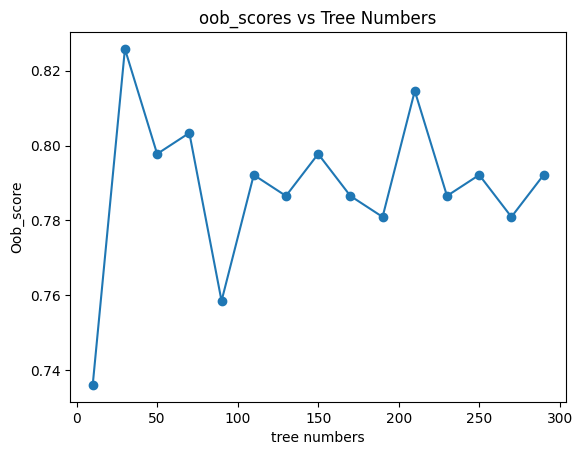

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

num_tree = range(10, 300, 20)
oob_scores = []

# Find the optimal random forest with Oob score
for i in num_tree:
    random_forest_model_2 = RandomForestClassifier(n_estimators=i, oob_score=True)
    random_forest_model_2.fit(Xtrain,ytrain)
    oob_scores.append(random_forest_model_2.oob_score_)

plt.plot(num_tree, oob_scores, marker='o')
plt.title('oob_scores vs Tree Numbers')
plt.xlabel('tree numbers')
plt.ylabel('Oob_score')
plt.show()


In [14]:
optimal_index_oob = np.argmax(oob_scores)
optimal_num_tree = optimal_index_oob * 20 + 10
print(f'optimal oob score: {np.max(oob_scores)}')
print(f'optimal number of trees in random forest: {optimal_num_tree}')

optimal oob score: 0.8258426966292135
optimal number of trees in random forest: 30


Test accuracy of model on validation dataset 0.864406779661017


Index(['Age', 'Chest_Pain_Type', 'Resting_Blood_Pressure', 'Serum_Cholesterol',
       'Max_Heart_Rate_Achieved', 'ST_Depression_Exercise',
       'Num_Major_Vessels_Flouro', 'Thalassemia'],
      dtype='object')

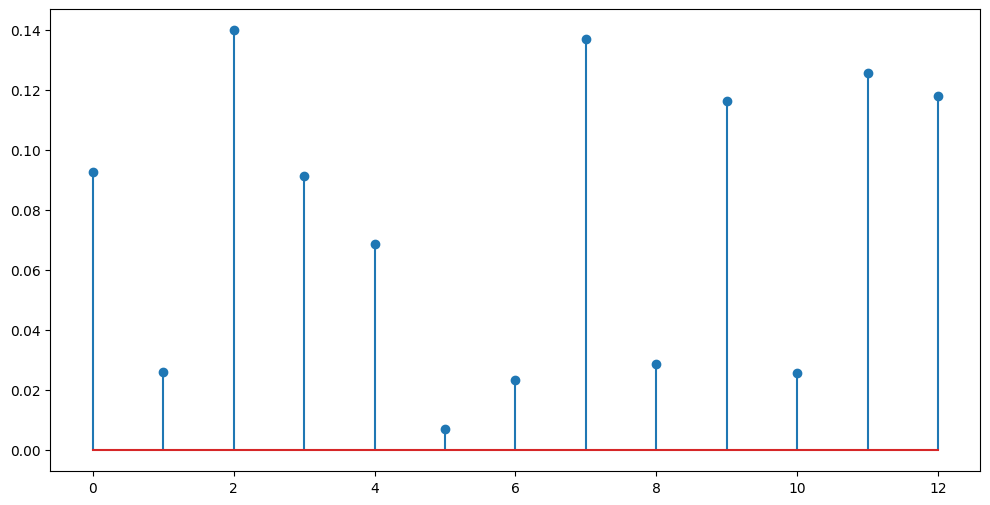

In [15]:
# test the performance of optimal tree on validation dataset
from sklearn.metrics import accuracy_score

random_forest_model_op = RandomForestClassifier(n_estimators=optimal_num_tree, random_state=123)
random_forest_model_op.fit(Xtrain, ytrain)
test_acc_val = accuracy_score(yval, random_forest_model_op.predict(Xval))
print(f'Test accuracy of model on validation dataset {test_acc_val}')

# Find the important variables
plt.figure(figsize=(12,6))
plt.stem(random_forest_model_op.feature_importances_)

# The important features of random forest
feature_list = random_forest_model_op.feature_importances_ > 0.06
temp_df = df_filter
temp_df.drop(columns='Diagnosis_Heart_Disease').columns[feature_list]


In [16]:
# test the performance of optimal tree on test dataset
ypredict_rf = random_forest_model_op.predict(Xtest)
test_acc = accuracy_score(ytest, ypredict_rf)
print(f'Test accuracy of model on testing dataset {test_acc}')

Test accuracy of model on testing dataset 0.9


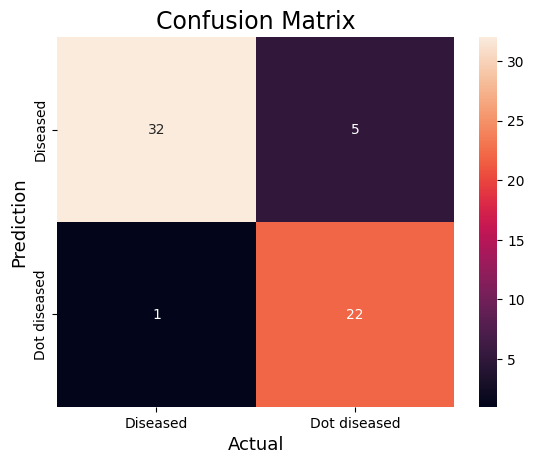

In [17]:
from sklearn.metrics import confusion_matrix
confm = confusion_matrix(ytest,ypredict_rf)
sns.heatmap(confm, annot=True,
            fmt='g',
            xticklabels= ['Diseased','Dot diseased'],
            yticklabels= ['Diseased','Dot diseased'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.savefig('Confusion Matrix_Random Forest')

In [18]:
# Naive bayes 
# Random Forest
# KNN

# 60% training 
# 20% validation 
# 20% testing

# 

# Method2: Lasso + Logistic Regression and KNN 

In [19]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       297 non-null    int64  
 1   Sex                       297 non-null    int64  
 2   Chest_Pain_Type           297 non-null    int64  
 3   Resting_Blood_Pressure    297 non-null    int64  
 4   Serum_Cholesterol         297 non-null    int64  
 5   Fasting_Blood_Sugar       297 non-null    int64  
 6   Resting_ECG               297 non-null    int64  
 7   Max_Heart_Rate_Achieved   297 non-null    int64  
 8   Exercise_Induced_Angina   297 non-null    int64  
 9   ST_Depression_Exercise    297 non-null    float64
 10  Peak_Exercise_ST_Segment  297 non-null    int64  
 11  Num_Major_Vessels_Flouro  297 non-null    object 
 12  Thalassemia               297 non-null    object 
 13  Diagnosis_Heart_Disease   297 non-null    int64  
dtypes: float64(1), 

In [20]:
"""
Split the data into training datasets and testing datasets

"""
from sklearn.model_selection import train_test_split
rng_seed = 454
Xtrain, Xtest, ytrain, ytest = train_test_split(df_filter.iloc[:, :-1],      
                                                df_filter['Diagnosis_Heart_Disease'],     
                                                test_size = 0.2,       
                                                random_state=rng_seed)

In [21]:
"""
Normalize the training data
"""
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(Xtrain)
Xtrain_norm = pd.DataFrame(X, index = Xtrain.index, columns = Xtrain.columns)   

In [22]:
"""  
Train the Lasso Logistic Regression model
"""
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

C = np.logspace(-3,3,40)
acc = np.empty(40)
models = list()

for c in range(len(C)):   
    
    print(c)
    
    model = Pipeline([('scaler', StandardScaler()),
                     ('logreg', LogisticRegression(C=C[c], penalty='l1', solver='liblinear', random_state=rng_seed))] )
    model.fit(Xtrain, ytrain)
    
    models.append(model)

    # Validation accuracy
    acc[c] = cross_val_score(model, Xtrain, ytrain, cv=4, scoring='accuracy').mean()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [23]:
#print(C)
#print(acc)
print(model)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=1000.0, penalty='l1', random_state=454,
                                    solver='liblinear'))])


In [24]:
"""  
Choose the best model
"""
# 1. Set `cstar` to the index of the best performing regularization value
cstar = np.argmax(acc)
print(cstar,C[cstar])

# 2. Set `acc_star` to the corresponding accuracy value
acc_star = acc[cstar]
print(acc_star)

17 0.41246263829013524
0.8314265536723163


(40, 13)
17


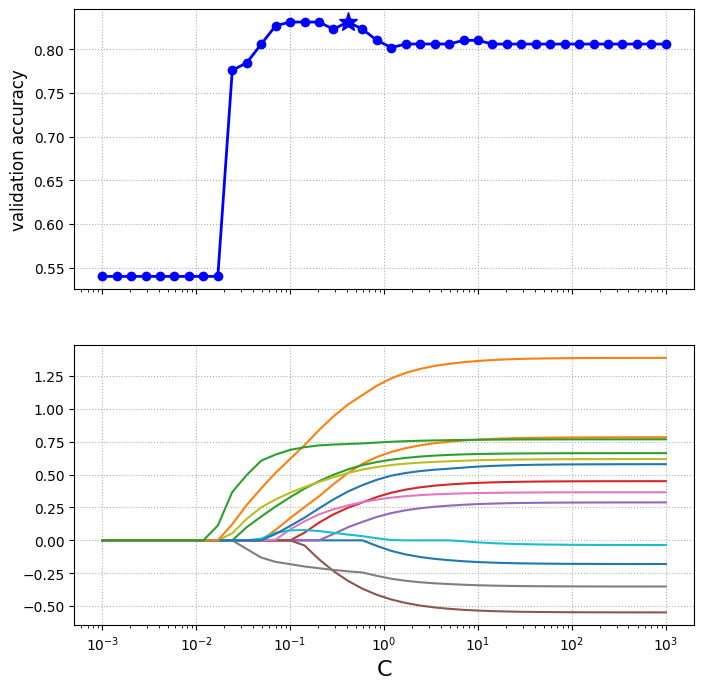

In [25]:
# The next bit of code extracts the coefficients of the logistic regression for each of the  values of `C`. 
# This is stored in `theta` , which is a (40,14) array. (14 is the number of features)
theta = np.vstack([model.named_steps['logreg'].coef_[0,:] for model in models])

# 3. Plot the validation accuracy as a function of `C`. (done already)
fig, ax = plt.subplots(figsize=(8,8),nrows=2,sharex=True)
ax[0].semilogx(C,acc,'o-',color='b',linewidth=2)
ax[0].semilogx(C[cstar],acc_star,'*',color='b',markersize=14)
ax[0].grid(linestyle=':')
ax[0].set_ylabel('validation accuracy',fontsize=12)

# 4. In a single plot, plot the 30 coefficients as a fucntion of `C`.
ax[1].semilogx(C,theta)
ax[1].grid(linestyle=':')
ax[1].set_xlabel('C',fontsize=16)
print(theta.shape)
print(np.argmax(acc))
plt.savefig('validation accuracy for LassoLogisticRegression train')

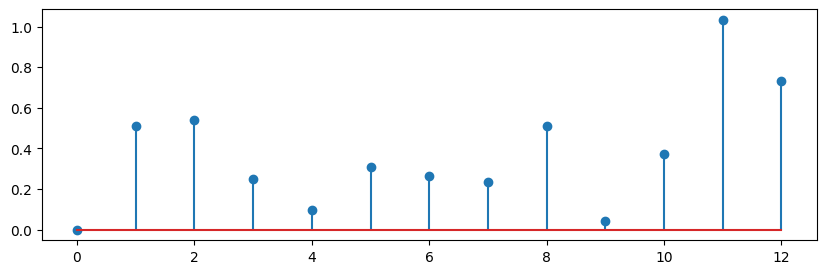

In [26]:
"""
Plot a picture,
and show the coefficients for the best-case regularized logistic regression found in the previous part.
Some of these coefficients have been set to zero. 
"""
theta_star = theta[cstar,:]

plt.figure(figsize=(10,3))
plt.stem(np.abs(theta_star))
plt.savefig('Feature extraction by Lasso')

In [27]:
features = Xtrain.columns
#print(theta_star)
# 1. Set `best_features` to the set of feature names corresponding to non-zero coefficients in the plot above. 
#print(theta_star.nonzero())
best_features = Xtrain.columns[theta_star.nonzero()]

# 2. Set `max_theta_feature` to the feature name corresponding to the coefficient with maximum absolute value. 
max_theta_feature =Xtrain.columns[np.argmax(np.abs(theta_star))]

# 3. Save the selected lasso model to the variable `lasso_model`.
lasso_model =models[cstar]

In [28]:
from sklearn.metrics import accuracy_score
yhat = lasso_model.predict(Xtest)
lasso_test =  accuracy_score(ytest,yhat)
print(lasso_test)

0.8


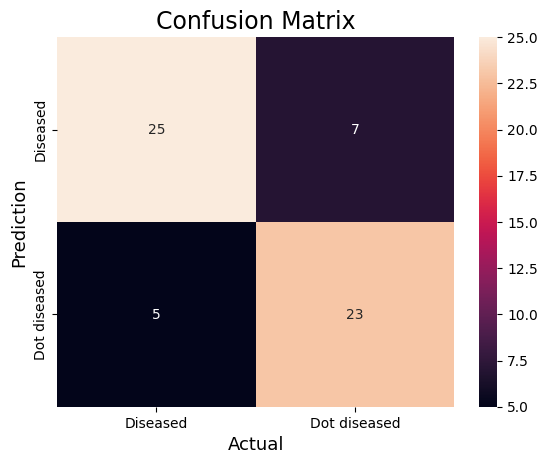

In [29]:
from sklearn.metrics import confusion_matrix
confm = confusion_matrix(ytest,yhat)
sns.heatmap(confm, annot=True,
            fmt='g',
            xticklabels= ['Diseased','Dot diseased'],
            yticklabels= ['Diseased','Dot diseased'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.savefig('Confusion Matrix_LassoLogisticRegression')

In [30]:
"""  
After we get the weighted for each features, we can apply dimension reduction to the data set.
Multiple every feature with each weight and turn the datasets into two-dimensional data
Axial y: Input (all features with weights)
Axial x: output (1-Diseased, 0-Not diseased)
"""
def ComputeScores(X,theta):
    theta = np.abs(theta)
    X_numeric = X.astype(float)
    weighted_X = X_numeric.mul(theta,axis=1)
    #scores = weighted_X.sum(axis=1, numeric_only=True)
    
    return weighted_X


In [31]:
NewXtrain = ComputeScores(Xtrain,theta_star)
NewXtest = ComputeScores(Xtest,theta_star)
#NewXtrain.info()
ytest.info()

<class 'pandas.core.series.Series'>
Index: 60 entries, 82 to 146
Series name: Diagnosis_Heart_Disease
Non-Null Count  Dtype
--------------  -----
60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [32]:
"""  
Train Knn model 
"""
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = Pipeline([('scaler', StandardScaler()),
                  ('knn', KNeighborsClassifier(n_neighbors=6))])

model.fit(NewXtrain,ytrain)
yhat_knn = model.predict(NewXtest)
knn_test = accuracy_score(ytest,yhat_knn)
print(knn_test)


0.7833333333333333


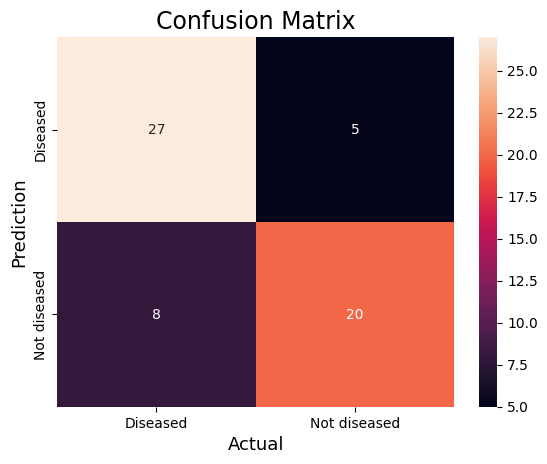

In [33]:
from sklearn.metrics import confusion_matrix
confm_knn = confusion_matrix(ytest,yhat_knn)
sns.heatmap(confm_knn, annot=True,
            fmt='g',
            xticklabels= ['Diseased','Not diseased'],
            yticklabels= ['Diseased','Not diseased'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.savefig('Confusion Matrix_LassoKnn')

In [34]:
""" 
Comparing with raw data 
Use raw data to train Knn model 
"""
model.fit(Xtrain,ytrain)
yhat_knn_rawdata = model.predict(NewXtest)
knn_test = accuracy_score(ytest,yhat_knn_rawdata)
print(knn_test)


0.5666666666666667


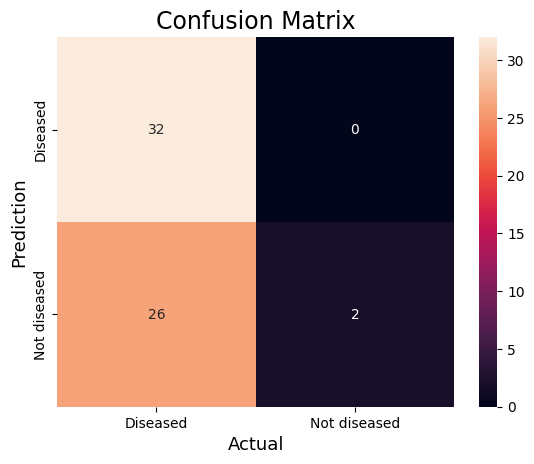

In [35]:
confm_knn = confusion_matrix(ytest,yhat_knn_rawdata)
sns.heatmap(confm_knn, annot=True,
            fmt='g',
            xticklabels= ['Diseased','Not diseased'],
            yticklabels= ['Diseased','Not diseased'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.savefig('Confusion Matrix_RawdataKnn')

In [36]:
""""
Compare the FP and FN case among two cases
"""
yhat_df = pd.Series(yhat, index=ytest.index)

FP_mask = (ytest==0) & (yhat_df==1)
FN_mask = (ytest==1) & (yhat_df==0)

FP_index = ytest.index[FP_mask]
FN_index = ytest.index[FN_mask]

print("False Positive Indices:", FP_index)
print("False Negative Indices:", FN_index)

False Positive Indices: Index([92, 58, 165, 144, 131, 179, 130], dtype='int64')
False Negative Indices: Index([124, 243, 145, 44, 274], dtype='int64')


In [37]:
yhat_knn_df = pd.Series(yhat_knn, index=ytest.index)

FP_mask = (ytest==0) & (yhat_knn_df==1)
FN_mask = (ytest==1) & (yhat_knn_df==0)

FP_index = ytest.index[FP_mask]
FN_index = ytest.index[FN_mask]

print("False Positive Indices:", FP_index)
print("False Negative Indices:", FN_index)

False Positive Indices: Index([92, 165, 144, 131, 130], dtype='int64')
False Negative Indices: Index([124, 114, 243, 145, 267, 44, 64, 274], dtype='int64')


# Method3: PCA + Kmeans

In [38]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

"""
# Preprocess the data
# Remove the first column as it seems to be an index
file_path = 'heart_disease 2.csv'
df = pd.read_csv(file_path)
df = df.drop(df.columns[0], axis=1)

# Convert categorical columns to numeric if needed
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data = df.dropna()
"""

data = df_filter

# Separate the features and the target variable
X = data.drop('Diagnosis_Heart_Disease', axis=1)
y = data['Diagnosis_Heart_Disease']

# Split the data into training (60%), testing (20%) and validation (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_pca)

# Predicting the clusters
y_train_pred = kmeans.predict(X_train_pca)
y_val_pred = kmeans.predict(X_val_pca)

# Since KMeans is unsupervised, we need to align the predicted clusters with the actual labels
# Mapping the cluster labels to actual labels
def align_clusters_with_labels(kmeans_labels, true_labels):
    label_map = {}
    for i in range(np.max(kmeans_labels) + 1):
        mask = kmeans_labels == i
        # Find the most common true label in this cluster
        common_label = np.bincount(true_labels[mask]).argmax()
        label_map[i] = common_label
    return label_map

# Align clusters for training and validation data
label_map_train = align_clusters_with_labels(y_train_pred, y_train)
label_map_val = align_clusters_with_labels(y_val_pred, y_val)

# Remap the predictions
y_train_pred_aligned = np.vectorize(label_map_train.get)(y_train_pred)
y_val_pred_aligned = np.vectorize(label_map_val.get)(y_val_pred)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred_aligned)
val_accuracy = accuracy_score(y_val, y_val_pred_aligned)

train_accuracy, val_accuracy

c:\Users\ian32\Desktop\SDSE\project2\E276-Final\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(0.5898876404494382, 0.6333333333333333)

# Method4: PCA+ Naive Bayes (Gaussian and Bernoulli)

Classification Report for Gaussian Naive Bayes:

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.85      0.88      0.87        26

    accuracy                           0.88        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.88      0.88      0.88        59



c:\Users\ian32\Desktop\SDSE\project2\E276-Final\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


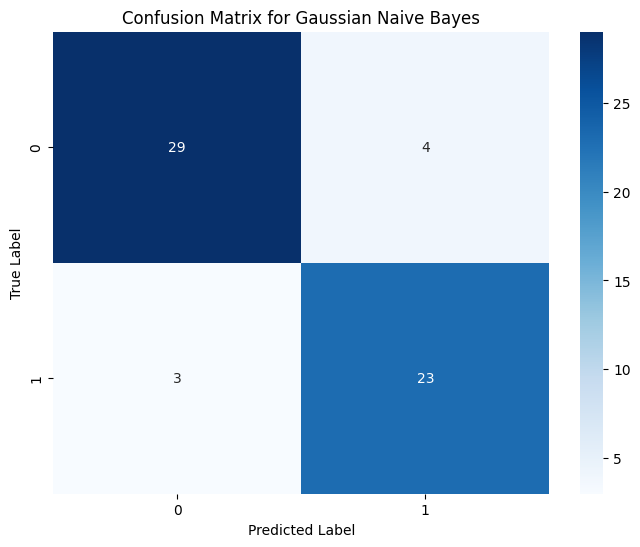

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing the data for Gaussian Naive Bayes model
X_train_gnb = Xtrain
X_valid_gnb = Xval

# Training the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_gnb, ytrain)

# Making predictions on the validation set
y_pred_gnb = gnb.predict(X_valid_gnb)

# Evaluating the model
report_gnb = classification_report(yval, y_pred_gnb)
conf_matrix_gnb = confusion_matrix(yval, y_pred_gnb)

# Displaying the classification report
print("Classification Report for Gaussian Naive Bayes:\n")
print(report_gnb)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gnb, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

c:\Users\ian32\Desktop\SDSE\project2\E276-Final\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


Classification Report for Bernoulli Naive Bayes:

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.71      0.85      0.77        26

    accuracy                           0.78        59
   macro avg       0.78      0.79      0.78        59
weighted avg       0.79      0.78      0.78        59



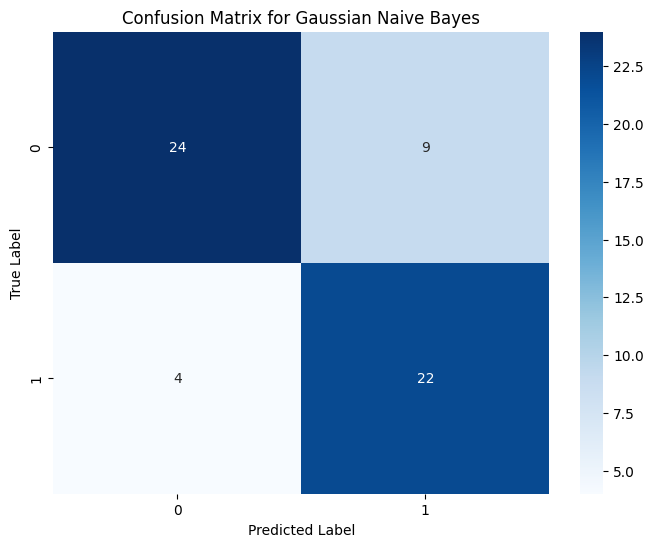

In [40]:
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import BernoulliNB

binary_check = {column: df_filter[column].unique() for column in df_filter.columns}
binarizer = Binarizer()
X_binarized = binarizer.fit_transform(X)

# Initialize and train the Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(Xtrain, ytrain)

# Predict on the validation set and evaluate
y_val_pred_bin = bnb.predict(Xval)
# Evaluating the model
report_bnb = classification_report(yval, y_val_pred_bin )
conf_matrix_bnb = confusion_matrix(yval, y_val_pred_bin )

# Displaying the classification report
print("Classification Report for Bernoulli Naive Bayes:\n")
print(report_bnb)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bnb, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()